In [109]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [110]:
# === Load dataset ===
df = pd.read_csv("data/voice_dataset.csv")

# === Fitur 36 kolom ===
feature_cols = [col for col in df.columns if col.startswith("mfcc")]
X = df[feature_cols].to_numpy()
y = df["status"].to_numpy()  # 0 = buka, 1 = tutup

print("=== Daftar Fitur yang Digunakan ===")
for i, col in enumerate(feature_cols, start=1):
    print(f"{i}. {col}")
print(f"\nTotal fitur: {len(feature_cols)} kolom\n")
print(f"Jumlah sampel: {X.shape[0]} suara\n")

=== Daftar Fitur yang Digunakan ===
1. mfcc0
2. mfcc1
3. mfcc2
4. mfcc3
5. mfcc4
6. mfcc5
7. mfcc6
8. mfcc7
9. mfcc8
10. mfcc9
11. mfcc10
12. mfcc11
13. mfcc12
14. mfcc13
15. mfcc14
16. mfcc15
17. mfcc16
18. mfcc17
19. mfcc18
20. mfcc19
21. mfcc20
22. mfcc21
23. mfcc22
24. mfcc23
25. mfcc24
26. mfcc25
27. mfcc26
28. mfcc27
29. mfcc28
30. mfcc29
31. mfcc30
32. mfcc31
33. mfcc32
34. mfcc33
35. mfcc34
36. mfcc35
37. mfcc36

Total fitur: 37 kolom

Jumlah sampel: 400 suara



In [111]:
# === CEK MISSING VALUE ===
print("=== CEK MISSING VALUE ===")
missing = df.isnull().sum()

print(missing[missing > 0])  # tampilkan hanya kolom yang memiliki missing

total_missing = missing.sum()
print(f"\nTotal missing value: {total_missing}")

if total_missing == 0:
    print("Tidak ada missing value.")


=== CEK MISSING VALUE ===


Series([], dtype: int64)

Total missing value: 0
Tidak ada missing value.


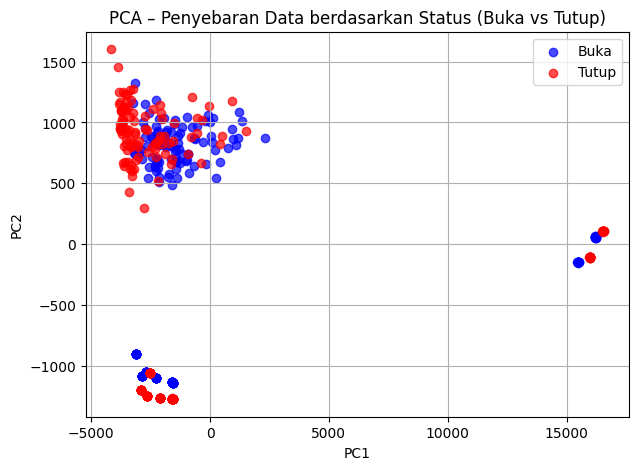

In [112]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("data/voice_dataset.csv")

feature_cols = [c for c in df.columns if c.startswith("mfcc")]
X = df[feature_cols].values
y_status = df["status"].values  # 0=buka, 1=tutup

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(7, 5))
colors = ["blue", "red"]
labels = ["Buka", "Tutup"]

for val in [0, 1]:
    idx = (y_status == val)
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1],
                alpha=0.7, label=labels[val], c=colors[val])

plt.title("PCA – Penyebaran Data berdasarkan Status (Buka vs Tutup)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


In [113]:
import numpy as np

# Hitung batas outlier per kolom
Q1 = df[feature_cols].quantile(0.25)
Q3 = df[feature_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mask outlier (boolean untuk setiap row)
outlier_mask = (df[feature_cols] < lower_bound) | (df[feature_cols] > upper_bound)
outlier_mask = outlier_mask.any(axis=1)  # True jika baris memiliki outlier
# Ambil semua file yang mengandung outlier
outlier_files = df.loc[outlier_mask, "filename"].unique()

print("=== File Penyebab Outlier ===")
for f in outlier_files:
    print(f"- {f}")

print(f"\nTotal file bermasalah: {len(outlier_files)}")


=== File Penyebab Outlier ===
- buka_006.wav
- buka_009.wav
- buka_014.wav
- buka_017.wav
- buka_022.wav
- buka_025.wav
- buka_030.wav
- buka_033.wav
- buka_038.wav
- buka_041.wav
- buka_046.wav
- buka_049.wav
- buka_054.wav
- buka_057.wav
- buka_062.wav
- buka_065.wav
- buka_070.wav
- buka_073.wav
- buka_078.wav
- buka_081.wav
- buka_086.wav
- buka_089.wav
- buka_094.wav
- buka_097.wav
- tutup_006.wav
- tutup_009.wav
- tutup_014.wav
- tutup_017.wav
- tutup_022.wav
- tutup_025.wav
- tutup_030.wav
- tutup_033.wav
- tutup_038.wav
- tutup_041.wav
- tutup_046.wav
- tutup_049.wav
- tutup_054.wav
- tutup_057.wav
- tutup_062.wav
- tutup_065.wav
- tutup_070.wav
- tutup_073.wav
- tutup_078.wav
- tutup_081.wav
- tutup_086.wav
- tutup_089.wav
- tutup_094.wav
- tutup_097.wav
- Rekaman baru 1.wav
- Rekaman baru 10.wav
- Rekaman baru 100.wav
- Rekaman baru 11.wav
- Rekaman baru 12.wav
- Rekaman baru 13.wav
- Rekaman baru 14.wav
- Rekaman baru 15.wav
- Rekaman baru 16.wav
- Rekaman baru 17.wav
- Reka

In [114]:
print("=== Jumlah Outlier per Fitur ===")
outlier_counts = (df[feature_cols] < lower_bound) | (df[feature_cols] > upper_bound)
outlier_counts = outlier_counts.sum().sort_values(ascending=False)
print(outlier_counts)


=== Jumlah Outlier per Fitur ===
mfcc2     72
mfcc1     65
mfcc34    64
mfcc0     53
mfcc36    51
mfcc35    48
mfcc11    44
mfcc10    41
mfcc32    29
mfcc33     7
mfcc3      5
mfcc8      3
mfcc7      1
mfcc29     1
mfcc28     0
mfcc25     0
mfcc26     0
mfcc27     0
mfcc5      0
mfcc30     0
mfcc31     0
mfcc23     0
mfcc24     0
mfcc21     0
mfcc22     0
mfcc6      0
mfcc20     0
mfcc19     0
mfcc4      0
mfcc17     0
mfcc16     0
mfcc15     0
mfcc14     0
mfcc13     0
mfcc12     0
mfcc9      0
mfcc18     0
dtype: int64


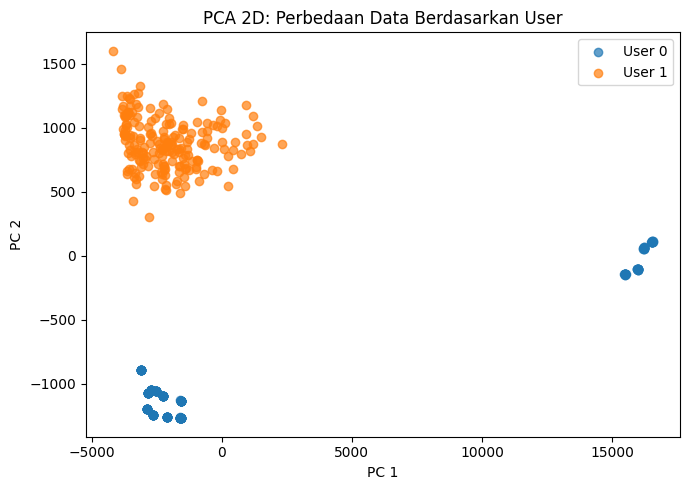

In [115]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = df[feature_cols].values
y_user = df["user"].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(7, 5))

for user in sorted(df['user'].unique()):
    idx = (y_user == user)
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], alpha=0.7, label=f'User {user}')

plt.title("PCA 2D: Perbedaan Data Berdasarkan User")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.tight_layout()
plt.show()


In [116]:
# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Pipeline RandomForest + StandardScaler ===
model_status = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(n_estimators=200, random_state=42))
])

# === Training ===
model_status.fit(X_train, y_train)

# === Prediksi ===
y_pred = model_status.predict(X_test)

# === Evaluasi ===
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=["buka", "tutup"])

print("=== Hasil Evaluasi Model Status ===")
print(f"Akurasi: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(class_report)




=== Hasil Evaluasi Model Status ===
Akurasi: 0.9750

Confusion Matrix:
[[38  2]
 [ 0 40]]

Classification Report:
              precision    recall  f1-score   support

        buka       1.00      0.95      0.97        40
       tutup       0.95      1.00      0.98        40

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [117]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


In [118]:
# === Load dataset ===
df = pd.read_csv("data/voice_dataset.csv")

feature_cols = [col for col in df.columns if col.startswith("mfcc")]
X = df[feature_cols].to_numpy()
y = df["user"].to_numpy()  # 0 = user1, 1 = user2

# === Tampilkan fitur yang digunakan ===
print("=== Daftar Fitur yang Digunakan ===")
for i, col in enumerate(feature_cols, start=1):
    print(f"{i}. {col}")
print(f"\nTotal fitur: {len(feature_cols)} kolom\n")

=== Daftar Fitur yang Digunakan ===
1. mfcc0
2. mfcc1
3. mfcc2
4. mfcc3
5. mfcc4
6. mfcc5
7. mfcc6
8. mfcc7
9. mfcc8
10. mfcc9
11. mfcc10
12. mfcc11
13. mfcc12
14. mfcc13
15. mfcc14
16. mfcc15
17. mfcc16
18. mfcc17
19. mfcc18
20. mfcc19
21. mfcc20
22. mfcc21
23. mfcc22
24. mfcc23
25. mfcc24
26. mfcc25
27. mfcc26
28. mfcc27
29. mfcc28
30. mfcc29
31. mfcc30
32. mfcc31
33. mfcc32
34. mfcc33
35. mfcc34
36. mfcc35
37. mfcc36

Total fitur: 37 kolom



In [119]:
feature_cols = [col for col in df.columns if col.startswith("mfcc")]
X = df[feature_cols].to_numpy()
y = df["user"].to_numpy()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(
        n_estimators=200,
        class_weight="balanced",
        random_state=42
    ))
])

model.fit(X_train, y_train)
joblib.dump(model, "models/user_model.pkl")


['models/user_model.pkl']

In [120]:
# === Simpan model dan feature order ===
os.makedirs("models", exist_ok=True)
joblib.dump(feature_cols, "models/feature_cols.pkl")

print("\n[INFO] Model user berhasil disimpan.")


[INFO] Model user berhasil disimpan.
